# Learning Gate - Reto 

### Modelo basado en deep learning para la discriminación entre gatos y perros

## Data Science Fundamentals - Tensorflow

## Introducción

Han pasado más de dos años desde que se descubrió la vacuna contra los zombis. Ahora un nuevo peligro amenaza el mundo. Algunas razas de perros son inmunes a la vacuna y pueden crear una nueva cepa del virus. La empresa estadounidense Small Pet, una vez que se dio cuenta del problema, dio aviso a todos los países para que estén alerta.

En México, la empresa Ciencia para el futuro se ha propuesto apoyar con la creación de una aplicación para identificar a dichos perros. Por ello, te ha contratado para que crees una App antes de que los perros infecten a su primera víctima con la nueva cepa del virus mortal.

¿Podrás lograrlo antes de que el mundo caiga nuevamente en manos de los zombis?

## Objetivos

- Diseñar modelos de redes neuronales profundas (deep learning), enfocándose en la clasificación de imágenes de acuerdo a categorías preestablecidas para resolver problemas con relevancia social, permitiendo generar valor en los diversos sectores.
- Crear modelos de datos Deep Neural Networks (DNN) utilizando PyTorch basado en Python; seleccionando el modelo adecuado y analizando la exactitud del modelo, para cumplir lo mejor posible con los requerimientos de la tarea requerida.

## Importing Libraries and Preparing Data

#### Importing Libraries

In [1]:
import os, glob, random, time, pathlib, PIL
from collections import OrderedDict
from tqdm import tqdm
from PIL import Image 
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sci
import matplotlib.pyplot as plt

%matplotlib inline

#### Loading Data

- ***Validating available data and defining the initial archive locations***

In this cell, the provided dataset is analyzed to ensure that the classes are unbiased. Additionally, the images are organized according to the type of pet and their respective breeds. This ensures that the training, validation, and test datasets created in the subsequent cells are balanced and free from bias toward specific breeds or types of cats or dogs.

In [2]:
path = os.path.join(os.getcwd(), 'Data', 'catsvsdogs')
DIR_BASE = pathlib.Path(path)
conteo_img = len(list(DIR_BASE.glob('*/*')))
print('Total of images composing the database: ', conteo_img, '\n')
datasets_path = os.path.join(os.getcwd(), 'Data', 'datasets')
Imagenes=[]
Etiquetas=[]
folders = []
counter = 0
    
for i, folder in enumerate(os.listdir(path)):
    DIR_Folder = os.path.join(os.getcwd(), 'Data', 'catsvsdogs', folder)
    for i, archivo in enumerate(os.listdir(DIR_Folder)):
        extensiones=[".jpg", "bmp", "gif", "jpeg", "png"]
        nom_archivo, ext_archivo = os.path.splitext(archivo)
        name = '_'.join(nom_archivo.split('_')[:-1])
        es_imagen = ext_archivo.lower() in extensiones
        es_archivo = os.path.isfile(os.path.join(os.getcwd(), 'Data', 'catsvsdogs', folder, archivo))
        if (es_archivo and es_imagen):           
            if name not in folders:
                if len(folders) > 0:
                    print('Images for the {} breed within the {} class: {}'.format(name, folder, counter))
                    counter = 0
                    
                os.mkdir(os.path.join(os.getcwd(), 'Data', 'datasets', folder, name))
                folders.append(name)
            counter += 1
            im1 = Image.open(os.path.join(DIR_Folder, archivo)).convert('RGB') 
            im1 = im1.save(os.path.join(os.getcwd(), 'Data', 'datasets', folder, name, archivo))


Total of images composing the database:  4898 

Images for the Bengal breed within the cats class: 200
Images for the Birman breed within the cats class: 200
Images for the Bombay breed within the cats class: 200
Images for the British_Shorthair breed within the cats class: 200
Images for the Egyptian_Mau breed within the cats class: 200
Images for the Maine_Coon breed within the cats class: 200
Images for the Persian breed within the cats class: 200
Images for the Ragdoll breed within the cats class: 200
Images for the Russian_Blue breed within the cats class: 200
Images for the Siamese breed within the cats class: 200
Images for the Sphynx breed within the cats class: 200
Images for the american_bulldog breed within the dogs class: 200
Images for the american_pit_bull_terrier breed within the dogs class: 100
Images for the basset_hound breed within the dogs class: 102
Images for the beagle breed within the dogs class: 100
Images for the boxer breed within the dogs class: 98
Images fo

- ***Creating the Testing, Validation and Testing Datasets archives locations***

Folder structures are created to organize the images that will be used to generate the training, validation, and testing datasets. These folders are based on the file structure created in the previous cell, ensuring robust datasets with little to no bias toward specific types of dogs or cats.

In [3]:
# Defining the proportion of the total data that will be used the mentioned datasets
train_per = .5
val_per = .25
test_per = .25
counter = 0
Total_Files = 0

print('Creating the Training, Validation and Testing datasets:')
paths = os.path.join(os.getcwd(), 'Data', 'datasets')
for clase in tqdm(os.listdir(paths)):
    path = os.path.join(paths, clase)
    flag = 0
    for folder in (os.listdir(path)):

        if flag == 0:
            os.mkdir(os.path.join(os.getcwd(), 'Data', 'Training_set', clase))
            os.mkdir(os.path.join(os.getcwd(), 'Data', 'Validation_set', clase))
            os.mkdir(os.path.join(os.getcwd(), 'Data', 'Testing_set', clase))      
            flag = 1
        
        total = len(os.listdir(os.path.join(path, folder)))
        training_elements = np.floor(train_per*total)
        validation_elements = np.floor(val_per*total)
        testing_elements = np.floor(test_per*total)
        Total_Files += total

        DIR_Folder = os.path.join(path, folder)
        randomly_selected_file = os.listdir(DIR_Folder)
        random.shuffle(randomly_selected_file)

        for n, archivo in enumerate(randomly_selected_file):

            if n <= training_elements:
                im1 = Image.open(os.path.join(DIR_Folder, archivo)).convert('RGB') 
                im1 = im1.save(os.path.join(os.getcwd(), 'Data', 'Training_set', clase, archivo))            
            elif n>training_elements and n<=(training_elements+validation_elements):
                im1 = Image.open(os.path.join(DIR_Folder, archivo)).convert('RGB') 
                im1 = im1.save(os.path.join(os.getcwd(), 'Data', 'Validation_set', clase, archivo))            
            else:
                im1 = Image.open(os.path.join(DIR_Folder, archivo)).convert('RGB') 
                im1 = im1.save(os.path.join(os.getcwd(), 'Data', 'Testing_set', clase, archivo))     
            
print()
print('Summary:')
print('Percentage of Cats elements within the Training set: ', 100*len(os.listdir(os.path.join(os.getcwd(), 'Data', 'Training_set', 'cats')))/Total_Files)
print('Percentage of Dogs elements within the Training set: ', 100*len(os.listdir(os.path.join(os.getcwd(), 'Data', 'Training_set', 'dogs')))/Total_Files)
print('Percentage of Cats elements within the Validation set: ', 100*len(os.listdir(os.path.join(os.getcwd(), 'Data', 'Validation_set', 'cats')))/Total_Files)
print('Percentage of Dogs elements within the Validation set: ', 100*len(os.listdir(os.path.join(os.getcwd(), 'Data', 'Validation_set', 'dogs')))/Total_Files)
print('Percentage of Cats elements within the Testing set: ', 100*len(os.listdir(os.path.join(os.getcwd(), 'Data', 'Testing_set', 'cats')))/Total_Files)
print('Percentage of Dogs elements within the Testing set: ', 100*len(os.listdir(os.path.join(os.getcwd(), 'Data', 'Testing_set', 'dogs')))/Total_Files)


Creating the Training, Validation and Testing datasets:


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:36<00:00, 18.28s/it]


Summary:
Percentage of Cats elements within the Training set:  24.759959141981614
Percentage of Dogs elements within the Training set:  25.883554647599592
Percentage of Cats elements within the Validation set:  12.257405515832483
Percentage of Dogs elements within the Validation set:  12.522982635342187
Percentage of Cats elements within the Testing set:  12.012257405515832
Percentage of Dogs elements within the Testing set:  12.563840653728294


## Creating a Torch Deep Learning Classifier

### Generatig the Training, Validation and Testing Datasets

- ***Defining paths contained data for each dataset to generate***

In [4]:
# Defining datasets paths
data_dir =  os.path.join(os.getcwd(), 'Data')
train_dir = os.path.join(data_dir, 'Training_set')
valid_dir = os.path.join(data_dir, 'Validation_set')
test_dir = os.path.join(data_dir, 'Testing_set')

- ***Generating the Datasets***

In [5]:
# Defining the Training, Validation and Testing Datasets

# Datasets will be normalized following imagenet standards
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.Resize((256,256)),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], 
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

validation_transforms = transforms.Compose([transforms.Resize((256,256)),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], 
                                                           [0.229, 0.224, 0.225])])

# Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
validation_data = datasets.ImageFolder(valid_dir, transform=validation_transforms)

#  Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)
validationloader = torch.utils.data.DataLoader(validation_data, batch_size=32)

### Creating the Torch Classifier 

 #### Using the Transfer Learning Property of AI Models

The classifier leverages the transfer learning capabilities of AI models, specifically using the VGG16 network architecture, developed by Simonyan and Zisserman for the ILSVRC 2014 competition, where it achieved an impressive accuracy of 92.7%. In this case, we can implement the VGG16 model with the help of the torchvision subpackage in Torch. However, the classifier component of the VGG16 model will be omitted to better tailor the model to the specific problem we are addressing.

In [6]:
#Loading a pretrained model
model = models.vgg16(weights='IMAGENET1K_V1')
#IMAGENET1K_FEATURES
#Replacing the classifier from the imported model, to adjust to the problem characteristics
for param in model.parameters():
    param.requires_grad = False

The VGG16 classifier consists of fully connected (dense) layers that are responsible for identifying relationships between patterns extracted by the convolutional layers of the VGG16 model from input images. The following image shows the structure of the VGG16 network architecture, sourced from the Graiphic.io website.

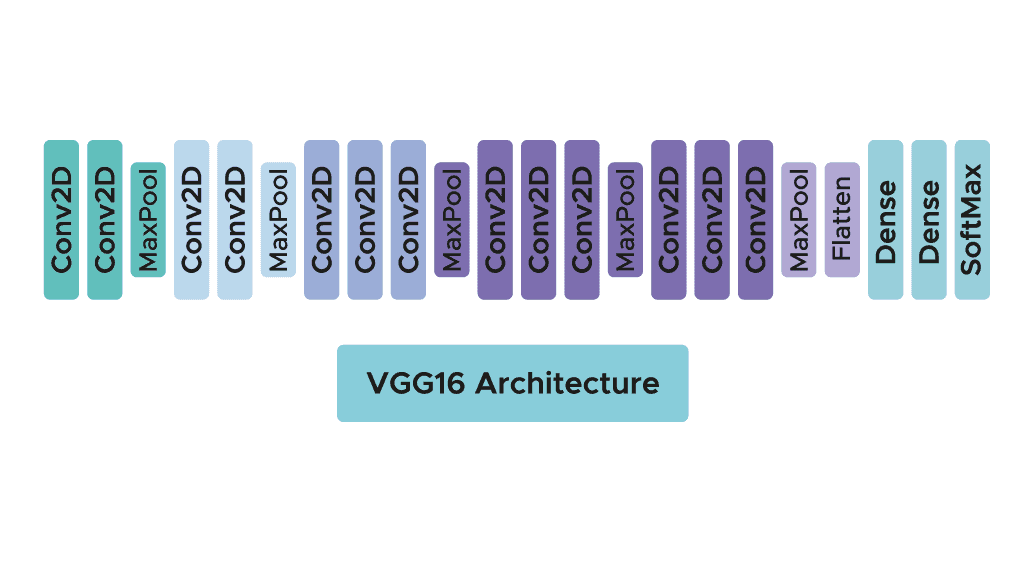

As previously mentioned, the classifier component of the VGG16 network will be replaced to adapt the network to the specific problem we are trying to solve. Therefore, the following network structure will be used as the new classifier:

In [7]:
# Creating the Model Classifier
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(7*7*512, 128)),
                          ('relu1', nn.ReLU()),
                          ('drop1',nn.Dropout(p=0.5)),
                          ('fc3', nn.Linear(128, 2)),
                          ('output', nn.Softmax(dim=1))
                          ]))
    
model.classifier = classifier

# Classifier Summary
model.classifier.parameters

<bound method Module.parameters of Sequential(
  (fc1): Linear(in_features=25088, out_features=128, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=2, bias=True)
  (output): Softmax(dim=1)
)>

### Training the Torch Model

- ***Defining training parameters***

In [8]:
# Metrics:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.classifier.parameters(), lr = 0.01, momentum=0.9)

# Training parameters
epochs = 10
print_every = 102
steps = 0

- ***Training the model***

In [9]:
# Using the local GPU
model.to('cuda')


# Defining variables to store performance metrics
train_losses = []
train_accus = []
validation_losses = []
validation_accus = []

# Evaluating each epoch
for e in range(epochs):
    running_loss = 0
    running_val_loss = 0
    #Training the network
    for images, labels in trainloader:
        images, labels = images.to('cuda'), labels.to('cuda')
        optimizer.zero_grad()
        
        # Forward pass
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        # Backward pass
        loss.backward()
        optimizer.step()
        # Calculating the model loss
        running_loss += loss.item() 
    # Evaluating the performance of the model
    else:
        accu_train = 0
        accu_val = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            for images, labels in trainloader:
                images, labels = images.to('cuda'), labels.to('cuda')
                log_ps = model(images)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accu_train += torch.mean(equals.type(torch.FloatTensor))
                  
            for images, labels in validationloader:
                images, labels = images.to('cuda'), labels.to('cuda')
                log_ps = model(images)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == labels.view(*top_class.shape)
                accu_val += torch.mean(equals.type(torch.FloatTensor))
                running_val_loss += criterion(log_ps, labels).item()
                                      
                    
        train_accus.append(accu_train/len(trainloader))
        validation_accus.append(accu_val/len(validationloader))
        train_losses.append(running_loss/len(trainloader))
        validation_losses.append(running_val_loss/len(validationloader))
        
        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Training Accuracy: {:.3f}.. ".format(accu_train/len(trainloader)),
              "Validation Loss: {:.3f}.. ".format(running_val_loss/len(validationloader)),
              "Validation Accuracy: {:.3f}.. ".format(accu_val/len(validationloader)))
           
        running_loss = 0

Epoch: 1/10..  Training Loss: 0.361..  Training Accuracy: 0.987..  Validation Loss: 0.326..  Validation Accuracy: 0.986.. 
Epoch: 2/10..  Training Loss: 0.326..  Training Accuracy: 0.992..  Validation Loss: 0.323..  Validation Accuracy: 0.990.. 
Epoch: 3/10..  Training Loss: 0.324..  Training Accuracy: 0.991..  Validation Loss: 0.322..  Validation Accuracy: 0.990.. 
Epoch: 4/10..  Training Loss: 0.323..  Training Accuracy: 0.994..  Validation Loss: 0.323..  Validation Accuracy: 0.992.. 
Epoch: 5/10..  Training Loss: 0.320..  Training Accuracy: 0.993..  Validation Loss: 0.323..  Validation Accuracy: 0.990.. 
Epoch: 6/10..  Training Loss: 0.320..  Training Accuracy: 0.995..  Validation Loss: 0.325..  Validation Accuracy: 0.988.. 
Epoch: 7/10..  Training Loss: 0.319..  Training Accuracy: 0.996..  Validation Loss: 0.325..  Validation Accuracy: 0.988.. 
Epoch: 8/10..  Training Loss: 0.320..  Training Accuracy: 0.996..  Validation Loss: 0.322..  Validation Accuracy: 0.992.. 
Epoch: 9/10..  T

- ***Learning Curves***

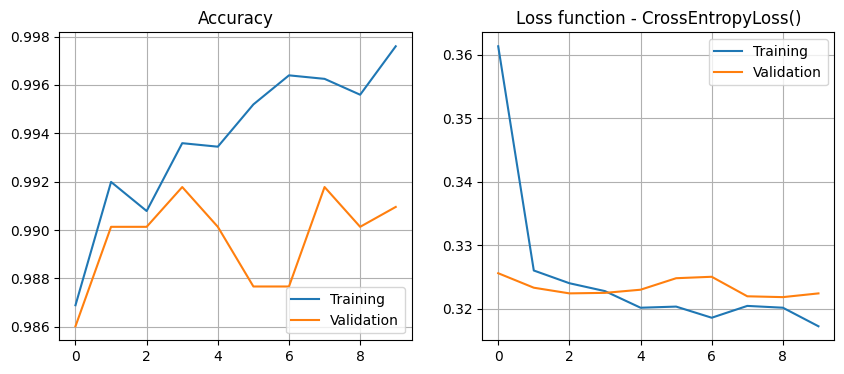

In [10]:
# Plotting the Learning Curves
plt.figure(figsize=(10, 4)) 
plt.subplot(1, 2, 1) 
plt.plot(range(epochs), train_accus, label='Training') 
plt.plot(range(epochs), validation_accus, label='Validation') 
plt.legend(loc='lower right') 
plt.title('Accuracy') 
plt.grid()

plt.subplot(1, 2, 2) 
plt.plot(range(epochs), train_losses, label='Training')
plt.plot(range(epochs), validation_losses, label='Validation') 
plt.legend(loc='upper right') 
plt.title('Loss function - {}'.format(criterion)) 
plt.grid() 

- ***Adding inference property to the created model***

In [11]:
model.class_to_idx = train_data.class_to_idx

### Evalauting the Performance of the Model with the Testing Dataset

In [12]:
# Using the Test set to evaluiate the performance of the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to('cuda'), labels.to('cuda')
        outputs = model.forward(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 99 %


## Using the Model to Inference Animals Within Images

Once the model is validated and meets the required performance for the application, it can be used to detect "zombie pets," specifically distinguishing between cats and dogs. However, preprocessing is necessary for the pet images before using them with the classifier, as the model has been trained to process images with specific characteristics, such as size and normalization. The following section provides custom functions that will serve as a pipeline to prepare pet images for use with the classifier, enabling it to determine whether these pets belong to a class susceptible to infection by the new zombie virus.

### Custom Functions to Preprocess Images

- ***Function to plot selected images***

In [13]:
# Function to adecuate the selected image to be used in the trained model
def process_input_image(image):
    
    '''
    input:
    
    image -> Image to adequate
    
    Output:
    
    Adequate Image
    '''
    
    image = image.transpose(Image.FLIP_LEFT_RIGHT)
    image = image.transpose(Image.ROTATE_90)    
    image = image.resize((256,256))
    image = image.crop((16,16,240,240))
    np_image = np.array(image)
    np_image = np_image/255
    np_image[:,:,0] = (np_image[:,:,0] - 0.485)/0.229
    np_image[:,:,1] = (np_image[:,:,1] - 0.456)/0.224
    np_image[:,:,2] = (np_image[:,:,2] - 0.406)/0.225
    np_image = np_image.T
    
    return torch.from_numpy(np_image)

# Function to plot the adequated image, after making inference
def imshow(image, ax=None):

    '''
    input:
    
    image -> Adequate image to plot
    ax -> subplot axis
    
    Output:
    
    ax -> Axis containing the displayed Image
    
    Adequate Image
    '''
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo Imagenet Normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    # Plotting Image
    ax.imshow(image)
    
    return ax

# Function to Make Inference - To classify Images
def predict(image_path, model, clases=2, device='cuda'):
    
    '''
    input:
    
    image -> Image to classify
    model -> Trained model to make inferences
    clases -> Number of classes to analyze
    device -> Device to run process the image, for the inference
    
    Output:
    
    psmax -> Probabilities for the classes to analyze
    prediction -> Classes associated with the given psmax
    
    Adequate Image
    '''
    
    image = Image.open(image_path)
    imagen = process_input_image(image)
    imagen = imagen[None, :, :, :]   
    imagen = imagen.float()
    
    with torch.no_grad():
        outputs = model(imagen.to(device))
    ps = F.softmax(outputs, dim=1)
    psmax = ps.topk(clases)
    psmax, psind = psmax[0][0].to('cpu').numpy(), psmax[1][0].to('cpu').numpy()

    prediction = []
    idx_to_class = {str(v): k for k, v in model.class_to_idx.items()}
    for indice in psind:
        prediction.append(idx_to_class[str(indice)])
    
    return psmax, prediction

# Function to plot inferences made by the trained model
def plotting_results(model, imagen_path, device='cuda'):

    '''
    input:
    
    model -> Trained model to make inferences
    image_path -> Path to the image to classify
    device -> Device to run process the image, for the inference
    
    '''
    
    imagen = Image.open(imagen_path)
    imagen = process_input_image(imagen)
    psmax, prediction = predict(imagen_path, model.to(device), clases=2, device=device)
    
    fig, axs = plt.subplots(1, 2, figsize=(7,3))
    a = axs[0]
    imshow(imagen, ax=a)
    a.set_xticks([])
    a.set_yticks([])
    a.set_title('Prediction: {}'.format(prediction[0][:-1]), size=14)
    
    b = axs[1]

    b.barh(prediction, psmax, height=0.5, color=['darkorange', 'royalblue'])
    b.set_yticks(b.get_yticks())
    b.set_yticklabels(['Is it a {}?'.format(prediction[0][:-1]), 'Is it a {}?'.format(prediction[1][:-1])],  fontsize = 12)
    b.invert_yaxis()
    b.set_title('Classes Probabilities', size=14)
    b.grid()
    
    #fig.tight_layout()
    plt.subplots_adjust(top=0.8)
    fig.tight_layout()

### Making Inferences - Classifying Images

The trained model can be used to classify any image containing cats or dogs. You simply need to provide the path to the folder that contains those images by assigning it to the path variable, as shown in the next cell. Once the path is set, you can run the cell, and the model will classify the images in the specified folder. The output will also show the probability of whether the pets in the images are dogs or cats.

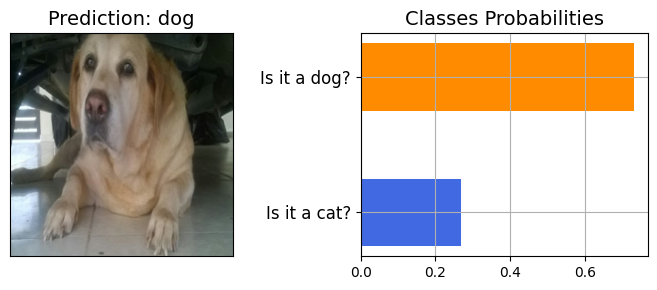

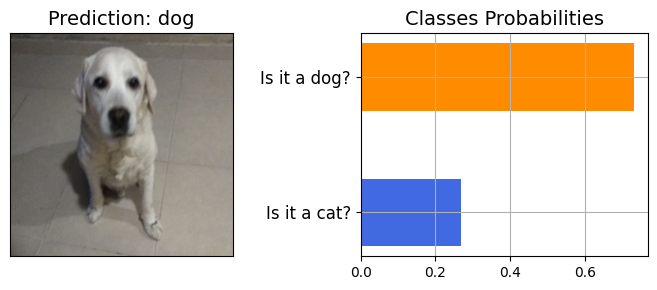

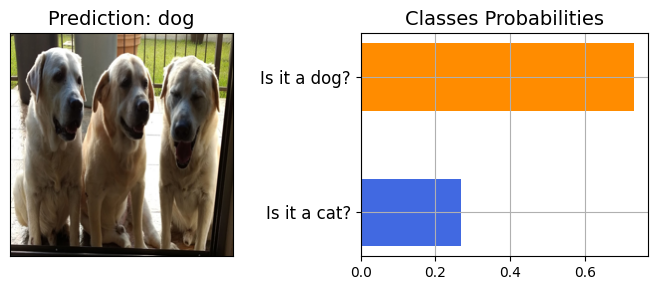

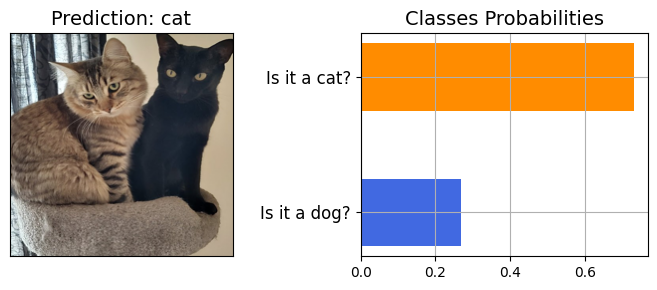

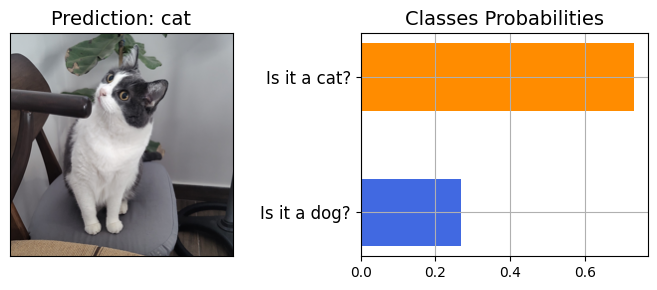

In [14]:
path = os.path.join(os.getcwd(), 'Data', 'Prueba')
images4model = []

cat_to_name = dict({0:'cats', 1:'dogs'})

for file in os.listdir(path):
    plotting_results(model, os.path.join(path, file), device='cuda')


## Conclusions

It can be concluded, based on the analysis of inferences made by the trained classifier, that the model is performing extremely well. This success is largely due to the use of transfer learning, provided by the torchvision module, as well as the quality of the dataset. In particular, the model benefits from well-balanced datasets, with minimal bias toward specific types of dogs or cats. This ensures that the data provide representative features of the pets we are trying to classify, which is crucial for reducing the number of zombie infections. As a result, the model can correctly identify potential infection targets, specifically dogs.

However, despite the model’s strong performance, it may be unnecessarily complex for this task. Due to the high computational cost of training the model, testing multiple network architectures was limited by time constraints, especially since an adequate solution had already been found.

# FIN